In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn
import tensorflow as tf

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
os.listdir("./")

['A_Z Handwritten Data.zip', 'Kaggle_Alphabet.ipynb', '.ipynb_checkpoints']

In [34]:
df_train = pd.read_csv('A_Z Handwritten Data.zip')

In [35]:
df_train.shape #372450 개의 dataset

(372450, 785)

In [36]:
df_train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_train.rename(columns={'0':'label'}, inplace=True)
# inplace option : 새로운 dataframe 을 return 할 지 여부

X = df_train.drop('label', axis = 1)
Y = df_train['label']

In [38]:
print("Shape : ",X.shape)
print("Columns count : ",len(X.iloc[1]))
# X.loc['Label name'], X.iloc['Label index (only integer)']

X.head()
# X.tail()

Shape :  (372450, 784)
Columns count :  784


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


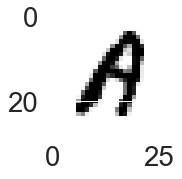

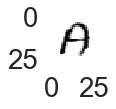

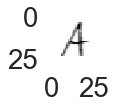

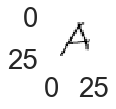

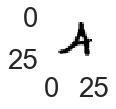

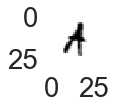

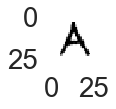

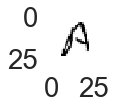

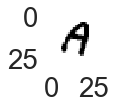

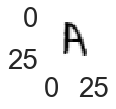

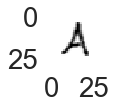

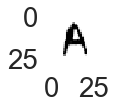

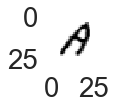

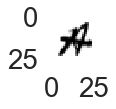

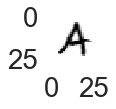

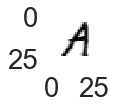

In [39]:
plt.figure(figsize = (12,10))
row, columns = 4,4

for i in range(16):
    plt.subplot(columns, row, i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
    plt.show()
    
# interpolation option : 말 그대로 '보간법', 중간값 보간해주는 방식.

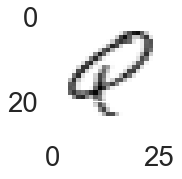

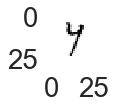

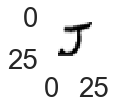

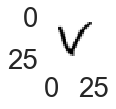

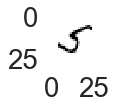

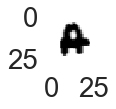

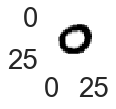

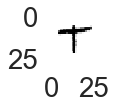

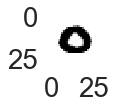

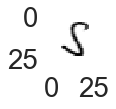

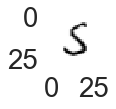

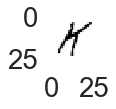

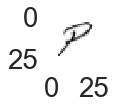

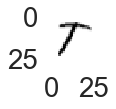

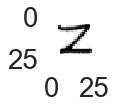

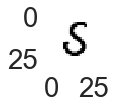

In [40]:
# shuffle 안해주면 A,B,...,Z 로 정렬되어 있음.
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, columns = 4,4

for i in range(16):
    plt.subplot(columns, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
    plt.show()

# cmap 은 colormap 으로 특정 값 영역에 따라 자동으로 색을 할당해주는 옵션이다.
# 하얀색, 검은색으로 보기 위해 Greys Option 사용

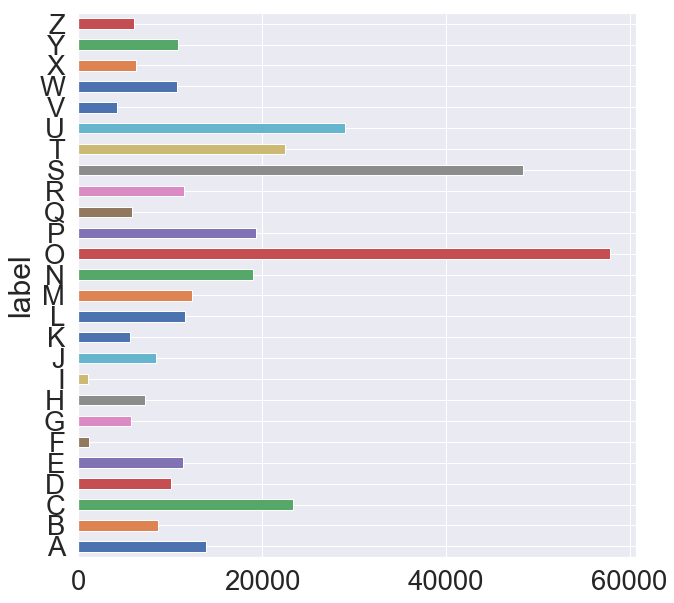

In [41]:
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
df_train_alphabets = df_train.copy()
df_train['label'] = df_train['label'].map(alphabets_mapper)
# map 은 함수를 적용하는 함수. Series 객체에 적용할 경우 map() 을, DataFrame 객체에 적용할 경우 applymap() 을 사용.
# Series 객체 : 배열과 같이 index 와 value 를 가지는 객체, DataFrame 객체 : 2차원 배열과 같은 Data Table -> Series 를 모아서 만든 Data Table

label_size = df_train.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

In [42]:
df_train.groupby('label').head()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13869,B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13870,B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13871,B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13872,B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13873,B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
Y.tail()

372445    25
372446    25
372447    25
372448    25
372449    25
Name: label, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# 원래는 from sklearn.cross_validation import train_test_split 인데 rename 됐다고 함.

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
# train data 75%, test data 25% 로 나눠주는 함수

standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)
# MinMaxScaler() : 변수들의 척도(Scale)가 다를 때 상호 비교를 위해  0~1 사이 값들로 transform 해주는 함수 ( 최대값 -> 1, 최솟값 -> 0)
# fit() : 적용해서 추정하는 함수. 위의 경우 MinMaxScaler() 에 X_train 을 적용하여 추정.

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
144211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

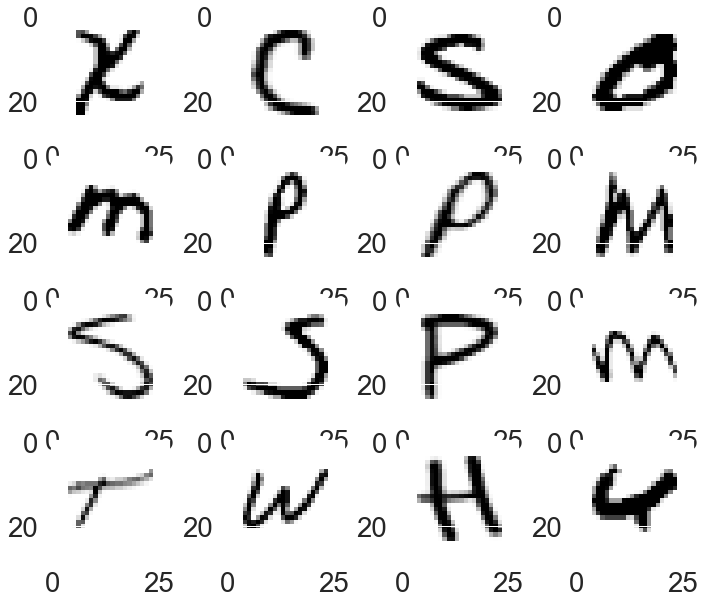

In [55]:
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, columns = 4,4

for i in range(16):
    plt.subplot(columns, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28), interpolation='nearest', cmap='Greys')

plt.show()

In [56]:
X_train.shape[0]
# 처음 데이터 372450 로 나눠보면 0.7499986575379246 로 75% 에 최대한 가깝게 나눠진다.

279337

In [59]:
from keras.utils import np_utils

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
# 입력을 one-hot encoding matrix 로 만든다.

In [66]:
from keras.models import Sequential
# 선형으로 레이어를 쌓는 모델
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils

cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
# Convolution Layer 추가, 32 : convolution filter 수, (5, 5) : convolution kernel 의 행과 열 수, input_shape : 입력 형태 (흑백 이미지라 채널 수는 1), activation : 활성화 함수

cls.add(MaxPooling2D(pool_size=(2, 2)))
# Pooling Layer 추가, pool_size : pooling window 크기
cls.add(Dropout(0.3))
# 0.3 비율만큼 임의의 입력 뉴런을 제외 -> Dropout
cls.add(Flatten())
# 학습된 데이터를 전달하기 위해서 2차원으로 다뤘던 데이터를 1차원으로 변환할 필요가 있기에 사용하는 Flatten Layer
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(Y.unique()), activation='softmax'))
# Input Layer 와 Output Layer 를 연결해주는 Dense Layer(전결합층)
# 128,len(Y.unique()) : 출력 뉴런 수, activation : 활성화 함수
# Y.unique() : Y 내의 고유한 값 배열. 따라서 len(Y.unique()) 는 26이 나온다. (A,B,...,Z) 

cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 학습에 대한 설정을 정의하는 compile 함수, 손실 함수는 categorical_crossentropy 방식으로 결정, 최적화 방식으로 Adam 을 사용, 모델 평가 기준은 accuracy 로 설정

history = cls.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=18, batch_size=200, verbose=2)
# train data 와 validation data 를 넣고, epochs=18 : 학습 데이터를 18번 사용, batch_size=200 : 한 번에 200개의 데이터 사용, verbose=2 : 얼마나 자세하게 정보를 표시할 것인지 지정 [0, 1, 2] ( 2가 가장 자세하게 표시 )

scores = cls.evaluate(X_test,Y_test, verbose=0)
print("CNN Score:",scores[1])

Instructions for updating:
Use tf.cast instead.
Train on 279337 samples, validate on 93113 samples
Epoch 1/18
 - 188s - loss: 1.0989 - acc: 0.6892 - val_loss: 0.5169 - val_acc: 0.8543
Epoch 2/18
 - 207s - loss: 0.4515 - acc: 0.8737 - val_loss: 0.3684 - val_acc: 0.8981
Epoch 3/18
 - 185s - loss: 0.3440 - acc: 0.9040 - val_loss: 0.2952 - val_acc: 0.9187
Epoch 4/18
 - 198s - loss: 0.2923 - acc: 0.9182 - val_loss: 0.2583 - val_acc: 0.9280
Epoch 5/18
 - 175s - loss: 0.2628 - acc: 0.9265 - val_loss: 0.2327 - val_acc: 0.9357
Epoch 6/18
 - 145s - loss: 0.2440 - acc: 0.9317 - val_loss: 0.2195 - val_acc: 0.9391
Epoch 7/18
 - 141s - loss: 0.2291 - acc: 0.9358 - val_loss: 0.2050 - val_acc: 0.9430
Epoch 8/18
 - 143s - loss: 0.2153 - acc: 0.9402 - val_loss: 0.1938 - val_acc: 0.9464
Epoch 9/18
 - 141s - loss: 0.2063 - acc: 0.9425 - val_loss: 0.1885 - val_acc: 0.9475
Epoch 10/18
 - 141s - loss: 0.1972 - acc: 0.9450 - val_loss: 0.1819 - val_acc: 0.9500
Epoch 11/18
 - 142s - loss: 0.1904 - acc: 0.9467 -

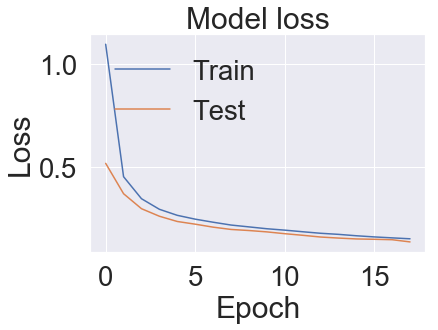

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# 도표 설명, loc : 설명 위치
plt.show()

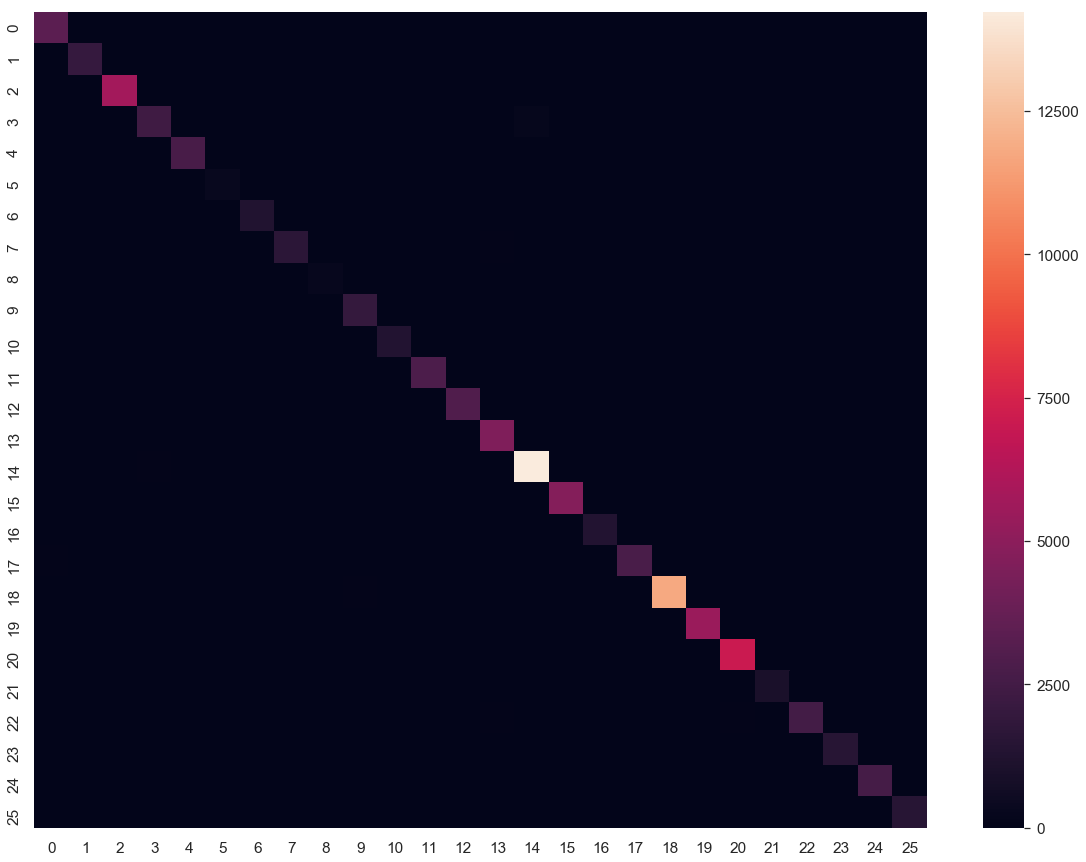

In [72]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test.argmax(axis=1),cls.predict(X_test).argmax(axis=1))
# confusion_matrix 는 원래 데이터와 모델을 통해 예측한 데이터가 일치하는지를 행과 열로 나타낸 것이다.
# argmax : 최댓값의 index 를 반환

df_cm = pd.DataFrame(cm,range(26),range(26))

plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
# annot : heatmap 안에 글씨 설정, annot 이 True 면 글씨 나옴.
# annot_kws -> 글씨 크기 설정